# Mayank Swiggy Price Predictor

In [1]:
import pandas as pd

In [2]:
Swiggy=pd.read_csv("data.csv")

In [3]:
Swiggy.head()

,Restaurant_Id,Rating,PrContinental__,Price_for_1,Delivery_review_number,Price of the dish
0,1,4.2,600,300,5000,2500
1,2,3.9,500,250,15000,7500
2,3,4.2,350,175,1000,500
3,4,4.4,1200,600,10000,5000
4,5,3.1,300,150,500,250


In [4]:
Swiggy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Restaurant_Id           516 non-null    int64  
 1   Rating                  516 non-null    float64
 2   PrContinental__         516 non-null    int64  
 3   Price_for_1             516 non-null    int64  
 4   Delivery_review_number  516 non-null    int64  
 5   Price of the dish       516 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 24.3 KB


In [5]:
Swiggy.describe()

,Restaurant_Id,Rating,PrContinental__,Price_for_1,Delivery_review_number,Price of the dish
count,516.000000,516.000000,516.000000,516.000000,516.000000,516.000000
mean,258.500000,3.712016,294.728682,147.383721,6540.697674,3270.348837
std,149.100637,0.534527,121.601242,60.804350,5550.062599,2775.031299
min,1.000000,1.700000,100.000000,50.000000,500.000000,250.000000
25%,129.750000,3.400000,200.000000,100.000000,1000.000000,500.000000
50%,258.500000,3.800000,300.000000,150.000000,5000.000000,2500.000000
75%,387.250000,4.100000,350.000000,175.000000,10000.000000,5000.000000
max,516.000000,4.800000,1200.000000,600.000000,15000.000000,7500.000000


In [6]:
%matplotlib inline

In [7]:
# import matplotlib.pyplot as plt
# Swiggy.hist(bins=50,figsize=(20,15))

## Train-Test Splitting

In [8]:
# import numpy as np
# def split_train_test(data,test_ratio):
#     np.random.seed(42)
#     shuffled=np.random.permutation(len(data))
#     print(shuffled)
#     test_set_size=int(len(data)*test_ratio)
#     test_indices=shuffled[:test_set_size]
#     train_indices=shuffled[test_set_size]
#     return data.iloc[train_indices],data.iloc[test_indices]

In [9]:
# train_set,test_set=split_train_test(Swiggy,0.2)

In [10]:
# print(f"Rows in train set : {len(train_set)}\nRows in test set:{len(test_set)}\n")

In [11]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(Swiggy,test_size=0.2,random_state=42)
print(f"Rows in train set : {len(train_set)}\nRows in test set:{len(test_set)}\n")

Rows in train set : 412
Rows in test set:104



In [12]:
from sklearn.model_selection import StratifiedShuffleSplit
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(Swiggy,Swiggy['Delivery_review_number']):
    strat_train_set=Swiggy.loc[train_index]
    strat_test_set=Swiggy.loc[test_index]

In [13]:
strat_test_set['Delivery_review_number'].value_counts()

Delivery_review_number
5000     22
15000    22
10000    21
500      21
1000     18
Name: count, dtype: int64

In [14]:
strat_train_set['Delivery_review_number'].value_counts()

Delivery_review_number
15000    87
5000     86
10000    85
500      85
1000     69
Name: count, dtype: int64

In [15]:
strat_train_set.shape

(412, 6)

# Looking for Coorelations

In [16]:
corr_matrix=Swiggy.corr()

In [17]:
corr_matrix['Rating'].sort_values(ascending=False)

Rating                    1.000000
PrContinental__           0.001917
Price_for_1               0.001638
Delivery_review_number   -0.026281
Price of the dish        -0.026281
Restaurant_Id            -0.271582
Name: Rating, dtype: float64

In [18]:
# from pandas.plotting import scatter_matrix
# attributes=['Rating','Price_for_1','Delivery_review_number','Price of the dish']
# scatter_matrix(Swiggy[attributes],figsize=(12,8))

<Axes: xlabel='Rating', ylabel='Price_for_1'>

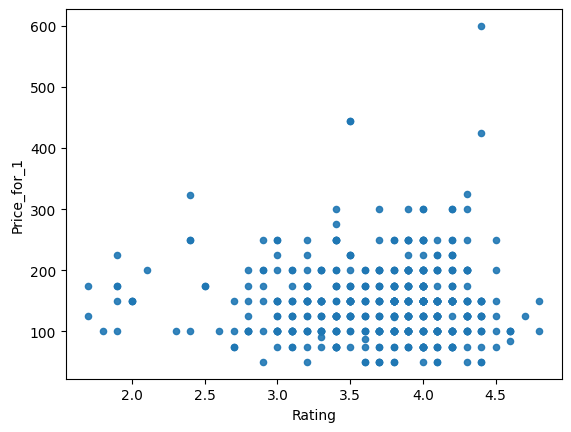

In [19]:
Swiggy.plot(kind="scatter",x="Rating",y='Price_for_1',alpha=0.9)

In [20]:
Swiggy=strat_train_set.drop("Price_for_1",axis=1)
Swiggy_labels=strat_train_set["Price_for_1"].copy()

# Modification in Data

In [21]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit(Swiggy)

SimpleImputer(strategy='median')

# Scikit Learn Design 

Three Type of Object
1. Estimators- It estimate paramaters based on DataSet, Ex-Imputer(Filling median in blank rows)
Two Method:
Fit method- Fits the dataset and calculate paramaters
2. Transformer- transform method take input and returns output based on the learnings from fit(). having function called fit_transform() which fits and tnasform.
3. Pridictors- Lienar Regression model, ex- fit(), predict(), score()-evaluate the predictions.

# Feature Scaling 

Two Types
1. Min-max scaling(Normalization)
    (value-min)/(max-min)
    sklearn provide class= MinMax Scaler
2. Standardization
    (value-mean)/std
    sklearn provide class= Standard Scaler

# Creating Pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler()),
])

In [23]:
Swiggy_num=my_pipeline.fit_transform(Swiggy)

In [24]:
Swiggy_num

array([[ 1.57700505e+00,  4.40388538e-04, -1.61250982e+00,
         6.23122397e-01,  6.23122397e-01],
       [ 3.14535811e-01, -1.08820008e+00, -3.95491552e-01,
        -1.00001624e+00, -1.00001624e+00],
       [-1.02894749e+00,  1.63340109e+00, -1.04456796e+00,
        -2.78621290e-01, -2.78621290e-01],
       ...,
       [ 9.82901877e-01,  5.44760622e-01,  2.44421774e+00,
        -1.00001624e+00, -1.00001624e+00],
       [-1.33950142e+00, -1.99540047e+00, -8.01164308e-01,
        -1.00001624e+00, -1.00001624e+00],
       [ 1.42172808e+00, -3.62439767e-01,  4.79711973e+00,
        -1.00001624e+00, -1.00001624e+00]])

In [25]:
Swiggy_num.shape

(412, 5)

## Selecting a desired model for Swiggy

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model=LinearRegression()
# model=DecisionTreeRegressor()
# model=RandomForestRegressor()
model.fit(Swiggy_num,Swiggy_labels)

LinearRegression()

In [27]:
some_data=Swiggy.iloc[:3]

In [28]:
some_labels=Swiggy_labels.iloc[:3]

In [29]:
prepared_data=my_pipeline.transform(some_data)

In [30]:
model.predict(prepared_data)

array([ 50.00624261, 125.04420254,  84.9809163 ])

In [31]:
list(some_labels)

[50, 125, 85]

# Evaluating the model

In [32]:
import numpy as np
from sklearn.metrics import mean_squared_error
Swiggy_predictions=model.predict(Swiggy_num)
mse=mean_squared_error(Swiggy_labels,Swiggy_predictions)
rmse=np.sqrt(mse)

In [33]:
rmse

0.09661838142704514

# Using better evaluation technique- Cross Validatation

In [34]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,Swiggy_num,Swiggy_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [35]:
rmse_scores

array([0.03805252, 0.12702957, 0.16578243, 0.10709284, 0.03089174,
       0.03534322, 0.07906632, 0.11706111, 0.0821482 , 0.12158927])

In [36]:
def print_scores(scores):
    print("Scores:",scores)
    print("Mean:",scores.mean())
    print("Standard deviation:",scores.std())

In [37]:
print_scores(rmse_scores)

Scores: [0.03805252 0.12702957 0.16578243 0.10709284 0.03089174 0.03534322
 0.07906632 0.11706111 0.0821482  0.12158927]
Mean: 0.0904057219334683
Standard deviation: 0.04300669309584452


# Using Joblib to produce Model

## Saving the Model 

In [38]:
from joblib import dump,load
dump(model,'Swiigy.joblib')

['Swiigy.joblib']

## Testing the model on test data

In [42]:
X_test=strat_test_set.drop("Price_for_1",axis=1)
Y_test=strat_test_set['Price_for_1'].copy()
X_test_prepared=my_pipeline.transform(X_test)
final_predictions=model.predict(X_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)
print(final_predictions,list(Y_test))

[125.01655519 100.02814191 200.00562088 124.99216765 200.02150516
 149.98373695 150.03599712 300.01782889 175.01552322  74.98216149
 150.00677208 100.00635425 150.04465243 125.04532335 100.01337404
 150.00782478 100.00718342  75.03060125 250.00612575 175.01818417
 150.02219884 225.03578422  75.00212816  75.00275965 150.02608981
 200.02134574 149.99887466  75.0016462  250.02034756 125.0306035
 225.03825829 150.00064976 100.00313354 149.5078984  150.00811991
 100.04072103 199.99868484 100.01279787 125.00828438 200.04251161
 250.06002487 150.09811096  75.00600853  75.03584807 150.00652703
 124.9952668  100.0065823  200.02692432 100.02272282  74.99979717
 150.03512814 250.08348567 175.00421199  75.00179064 100.01104299
 149.99580801 150.009904    74.99269382 150.0075427  250.03984766
  50.03261903  99.99131535  50.0120327  200.01580399  75.00805958
  99.99729996 100.00414805 100.03757185 125.0365609  100.03050967
  99.50665463 300.04189655 175.01530848 125.00830144 125.00867922
  50.005156

In [41]:
final_rmse

0.08832922360906241

In [43]:
prepared_data[0]

array([ 1.57700505e+00,  4.40388538e-04, -1.61250982e+00,  6.23122397e-01,
        6.23122397e-01])

## Using the model

In [44]:
from joblib import dump,load
import numpy as np
model=load('Swiigy.joblib')

In [46]:
features=np.array([[ 1.57700505e+00,  4.40388538e-04, -1.61250982e+00,  6.23122397e-01,6.23122397e-01]])
model.predict(features)

array([50.0062426])